# Linear Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(42)

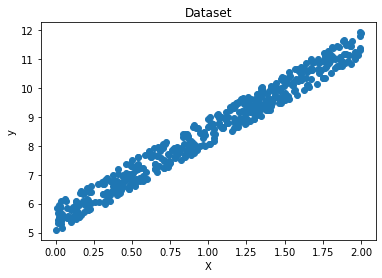

[[0.57199588]
 [0.80543233]
 [0.76016093]
 [0.1538999 ]
 [0.14924947]
 [0.26817437]
 [0.36107473]
 [0.40845558]
 [0.67969722]
 [0.05668043]]


In [7]:
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.rand(500, 1)

fig = plt.figure(figsize=(6, 4))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
class LinearRegression:

    def __init__(self):
        pass

    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias

            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")

            # Step 3: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y))

            # Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs

    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0

        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Cost at iteration 0: 75.06051155862136
Cost at iteration 100: 1.5270722611295318
Cost at iteration 200: 0.48156040776951975
Cost at iteration 300: 0.3697059762266023
Cost at iteration 400: 0.29516003829125714
Cost at iteration 500: 0.2401124633950443


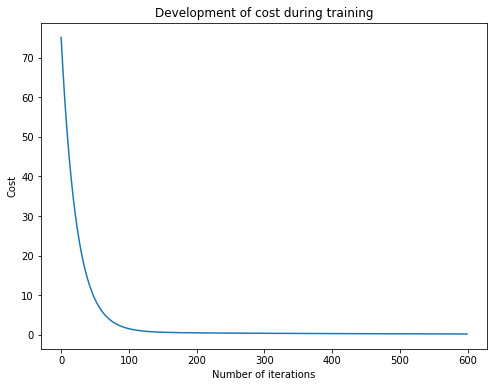

In [13]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=600)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()